## EDA

### Author: Lucia Zou
### Contact: lucia.zouyuebca@gmail.com 
### Date: Oct.20th, 2023

###

### Table of Contents
- [Data Import](#Data-Import)
- [Distributions and Graphs](#Distributions-and-Graphs)
- [Dig in Data](#Dig-in-data)
- [Correlation](#Correlation)

###

### Data Import

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import tsa
import statsmodels.api as sm

In [2]:
import pyarrow.parquet as pq

df = pd.read_parquet('IowaAfterClean3.parquet')

# Now, df contains the data from the Parquet file
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,11.0,Adair,1081600.0,...,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.8,1.26
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,31.0,Adair,1081200.0,...,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.0,0.79
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,42.0,Adams,1031100.0,...,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.5,2.77
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,42.0,Adams,1031100.0,...,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.0,2.37
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,77.0,Allamakee,1012200.0,...,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.5,0.39


In [3]:
#run this code to see all columns
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,11.0,Adair,1081600.0,Whiskey Liqueur,421.0,SAZERAC COMPANY INC,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.8,1.26
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,31.0,Adair,1081200.0,Cream Liqueurs,300.0,McCormick Distilling Co.,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.0,0.79
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,42.0,Adams,1031100.0,American Vodka,260.0,DIAGEO AMERICAS,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.5,2.77
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,42.0,Adams,1031100.0,American Vodka,55.0,SAZERAC NORTH AMERICA,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.0,2.37
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,77.0,Allamakee,1012200.0,Scotch Whiskies,260.0,DIAGEO AMERICAS,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.5,0.39


In [5]:
#Now our clean dataset has 2805303 rows and 23 columns
df.shape

(2805303, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805303 entries, 0 to 2805302
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   invoice_and_item_number  object 
 1   date                     object 
 2   store_number             int64  
 3   store_name               object 
 4   address                  object 
 5   city                     object 
 6   zip_code                 float64
 7   county_number            float64
 8   county                   object 
 9   category                 float64
 10  category_name            object 
 11  vendor_number            float64
 12  vendor_name              object 
 13  item_number              int64  
 14  item_description         object 
 15  pack                     int64  
 16  bottle_volume_ml         int64  
 17  state_bottle_cost        float64
 18  state_bottle_retail      float64
 19  bottles_sold             int64  
 20  sale_dollars             float64
 21  volume_s

In [7]:
df.describe()

,store_number,zip_code,county_number,category,vendor_number,item_number,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06
mean,4.117789e+03,5.124372e+04,5.712634e+01,1.055997e+06,2.871833e+02,5.456070e+04,1.194263e+01,8.218059e+02,1.122082e+01,1.698818e+01,1.185837e+01,1.624491e+02,9.380025e+00,2.473141e+00
std,1.273784e+03,9.906393e+02,2.732932e+01,1.039516e+05,1.415585e+02,9.184738e+04,7.846288e+00,5.254817e+02,1.093199e+01,1.654621e+01,3.566819e+01,5.871845e+02,4.120797e+01,1.088602e+01
min,2.106000e+03,5.000200e+04,1.000000e+00,1.011000e+06,3.300000e+01,2.580000e+02,1.000000e+00,2.000000e+01,6.600000e-01,9.900000e-01,1.000000e+00,1.340000e+00,2.000000e-02,0.000000e+00
25%,2.637000e+03,5.031400e+04,3.100000e+01,1.012100e+06,2.050000e+02,2.712500e+04,6.000000e+00,3.750000e+02,6.470000e+00,9.000000e+00,3.000000e+00,4.200000e+01,1.500000e+00,3.900000e-01
50%,4.162000e+03,5.104000e+04,6.200000e+01,1.031200e+06,2.600000e+02,3.991600e+04,1.200000e+01,7.500000e+02,8.750000e+00,1.349000e+01,6.000000e+00,8.892000e+01,4.500000e+00,1.180000e+00
75%,5.239000e+03,5.230200e+04,7.700000e+01,1.062500e+06,4.200000e+02,6.525100e+04,1.200000e+01,1.000000e+03,1.350000e+01,2.100000e+01,1.200000e+01,1.665000e+02,1.050000e+01,2.770000e+00
max,9.049000e+03,5.722200e+04,9.900000e+01,1.901200e+06,9.780000e+02,9.999950e+05,1.200000e+02,5.250000e+03,2.098940e+03,3.148410e+03,1.320000e+04,2.509320e+05,1.320000e+04,3.487070e+03


In [8]:
df.nunique()

invoice_and_item_number    2805303
date                           326
store_number                  1929
store_name                    1952
address                       1936
city                           442
zip_code                       479
county_number                   99
county                          99
category                        47
category_name                   47
vendor_number                  222
vendor_name                    222
item_number                   4543
item_description              4029
pack                            21
bottle_volume_ml                25
state_bottle_cost             1287
state_bottle_retail           1315
bottles_sold                   397
sale_dollars                 11136
volume_sold_liters             761
volume_sold_gallons            761
dtype: int64

### 

### Distributions and Graphs

#### Distribution of Categorical Variables

In [9]:
# Convert the 'date' column to datettime
df['date'] = pd.to_datetime(df['date'])

df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.week

df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_18912\1593080801.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week


,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,day,month,week
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,11.0,Adair,1081600.0,Whiskey Liqueur,421.0,SAZERAC COMPANY INC,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.8,1.26,4,1,1
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,31.0,Adair,1081200.0,Cream Liqueurs,300.0,McCormick Distilling Co.,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.0,0.79,4,1,1
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,42.0,Adams,1031100.0,American Vodka,260.0,DIAGEO AMERICAS,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.5,2.77,4,1,1
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,42.0,Adams,1031100.0,American Vodka,55.0,SAZERAC NORTH AMERICA,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.0,2.37,4,1,1
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,77.0,Allamakee,1012200.0,Scotch Whiskies,260.0,DIAGEO AMERICAS,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.5,0.39,4,1,1


In [10]:
#sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805303 entries, 0 to 2805302
Data columns (total 26 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   invoice_and_item_number  object        
 1   date                     datetime64[ns]
 2   store_number             int64         
 3   store_name               object        
 4   address                  object        
 5   city                     object        
 6   zip_code                 float64       
 7   county_number            float64       
 8   county                   object        
 9   category                 float64       
 10  category_name            object        
 11  vendor_number            float64       
 12  vendor_name              object        
 13  item_number              int64         
 14  item_description         object        
 15  pack                     int64         
 16  bottle_volume_ml         int64         
 17  state_bottle_cost        fl

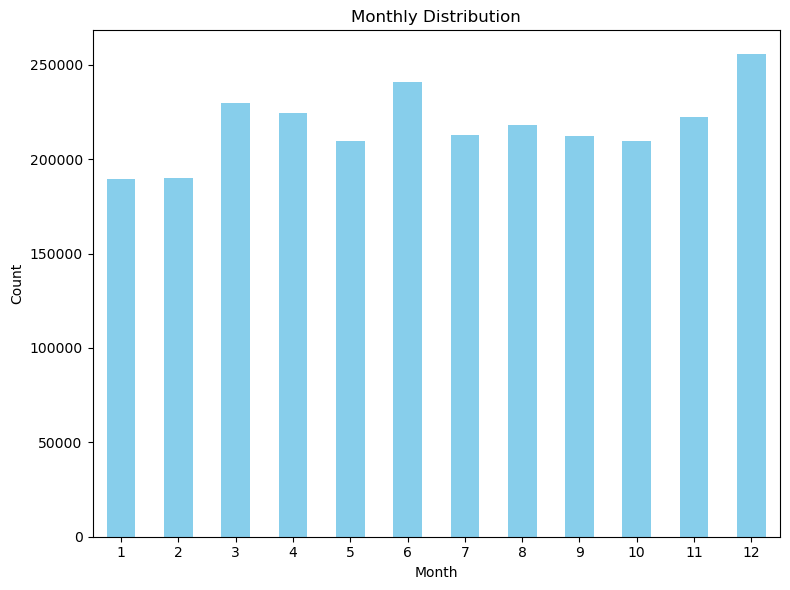

In [14]:
monthly_distribution = df.groupby('month').size()

# Adjust the first month's distribution by dividing it by 2
monthly_distribution.loc[1] = monthly_distribution.loc[1] / 2

# Plot the monthly distribution
plt.figure(figsize=(8, 6))
monthly_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Distribution')
plt.xticks(rotation=0)
plt.tight_layout() 
plt.show()

There is a noticeable increase in the count towards the end of the year, particularly in the last month. This could be indicative of a seasonal trend where activities or sales increase during the end-of-year holidays.
Despite the variations, the overall stability of the distribution indicates that there are no major disruptions to the measured activity throughout the year. The business or phenomenon behind the data likely has a steady operation or occurrence rate.

This pattern could suggest some form of seasonality, particularly if the peaks in June and December correspond to seasonal events (like holidays or sales periods) that are known to affect whatever metric "Count" is tracking. The substantial drop in January and February might also be significant if it is linked to seasonal behavior.
The liquor store may experience stable demand with potential for targeted marketing during slight dips or opportunities for special promotions during the busier months.

###

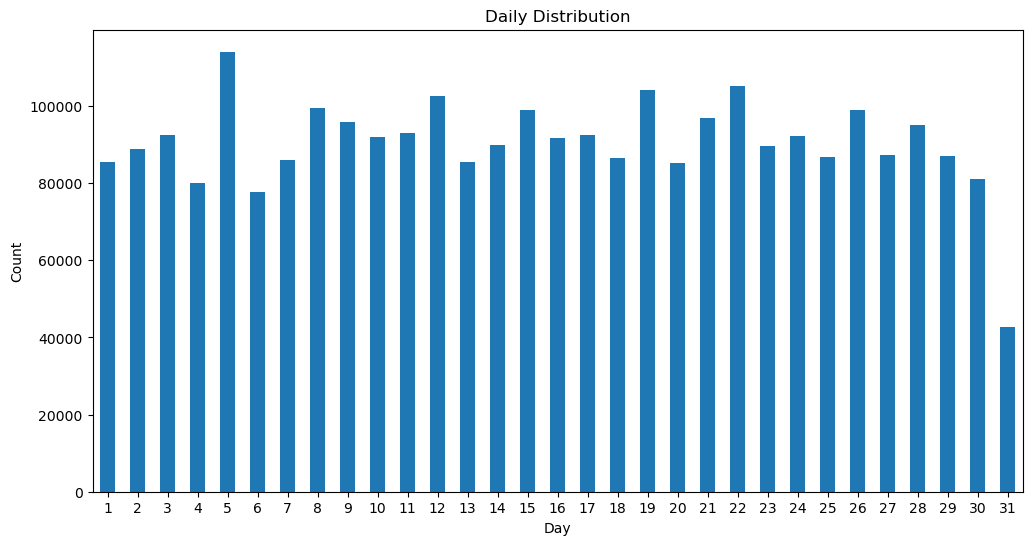

In [15]:
# Daily distribution
daily_distribution = df.groupby('day').size()
plt.figure(figsize=(12, 6))
daily_distribution.plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Daily Distribution')
plt.xticks(rotation=0)
plt.show()

The graph unveils an obvious pattern: the 31st of the month exhibits the lowest frequency of orders. This suggests a potential customer behavior trend, indicating a reluctance to purchase alcohol towards the end of the month. This behavior may related to the day that people receieve salaries.  Alternatively, it could signify a strategic choice by store owners to limit operations on the 31st, aligning with this observed decrease in sales activity.

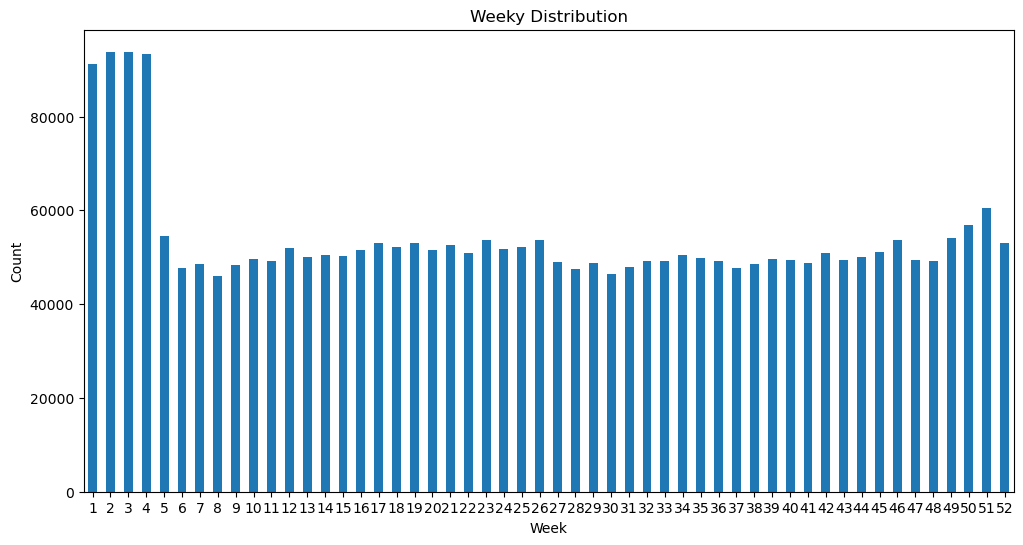

In [18]:
weekly_distribution = df.groupby('week').size()

weekly_distribution.loc[1:4] = weekly_distribution.loc[1:4] / 2

Weeky_distribution = df.groupby('week').size()
plt.figure(figsize=(12, 6))
Weeky_distribution.plot(kind='bar')
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Weeky Distribution')
plt.xticks(rotation=0)
plt.show()

###

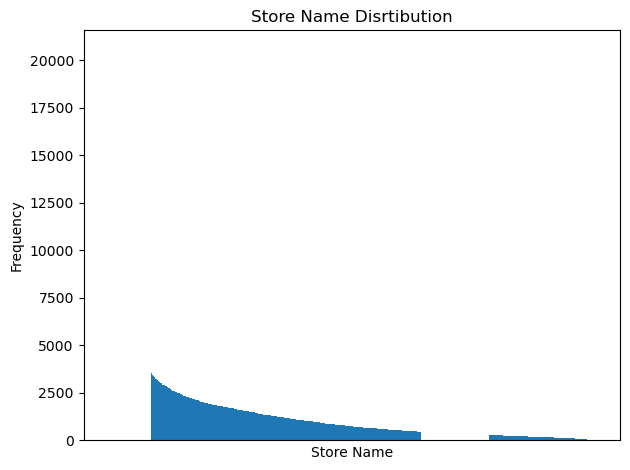

In [19]:
store_name_counts = df['store_name'].value_counts()

plt.figure()
plt.bar(store_name_counts.index, store_name_counts.values)
plt.xlabel('Store Name')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('Store Name Disrtibution')
plt.tight_layout()
plt.show()

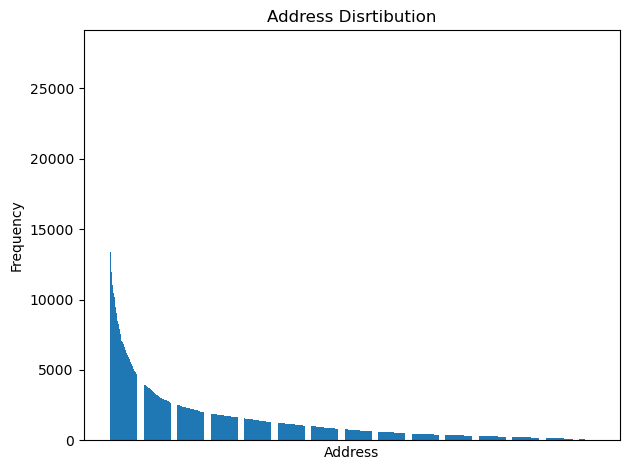

In [20]:
address_counts = df['address'].value_counts()

plt.figure()
plt.bar(address_counts.index, address_counts.values)
plt.xlabel('Address')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('Address Disrtibution')
plt.tight_layout()
plt.show()

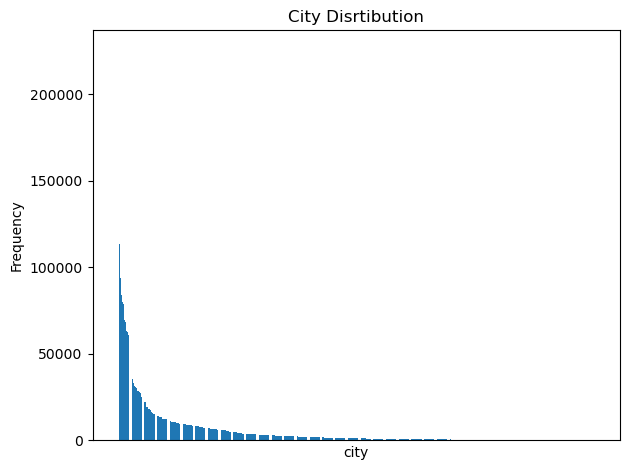

In [21]:
city_counts = df['city'].value_counts()

plt.figure()
plt.bar(city_counts.index, city_counts.values)
plt.xlabel('city')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('City Disrtibution')
plt.tight_layout()
plt.show()

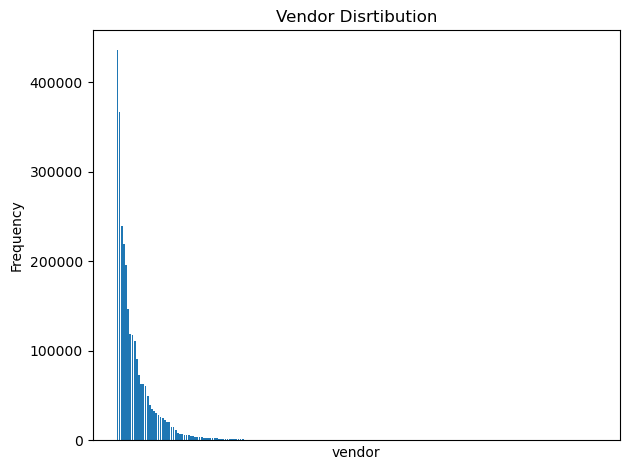

In [22]:
vendor_name_counts = df['vendor_name'].value_counts()

plt.figure()
plt.bar(vendor_name_counts.index, vendor_name_counts.values)
plt.xlabel('vendor')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('Vendor Disrtibution')
plt.tight_layout()
plt.show()

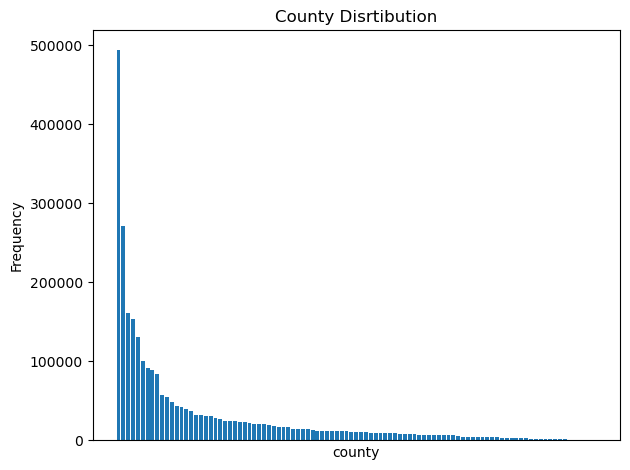

In [23]:
county_counts = df['county'].value_counts()

plt.figure()
plt.bar(county_counts.index, county_counts.values)
plt.xlabel('county')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('County Disrtibution')
plt.tight_layout()
plt.show()

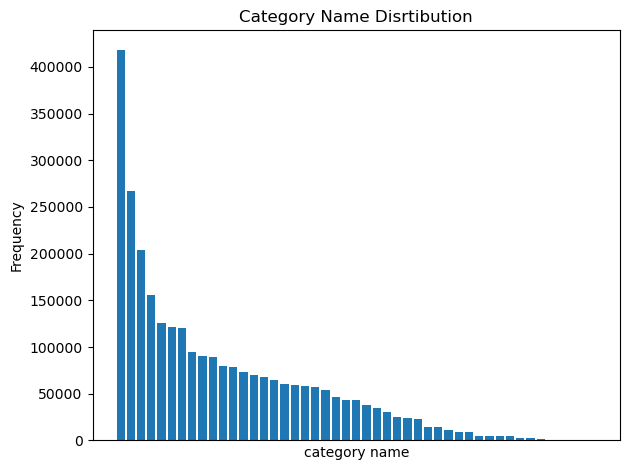

In [24]:
category_name_counts = df['category_name'].value_counts()

plt.figure()
plt.bar(category_name_counts.index, category_name_counts.values)
plt.xlabel('category name')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('Category Name Disrtibution')
plt.tight_layout()
plt.show()

###

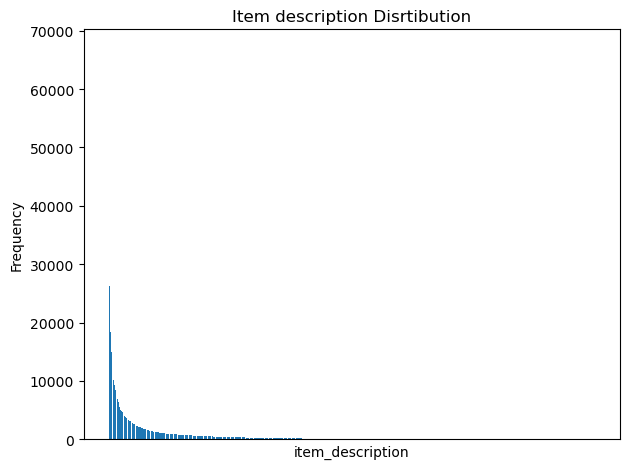

In [25]:
item_description_counts = df['item_description'].value_counts()

plt.figure()
plt.bar(item_description_counts.index, item_description_counts.values)
plt.xlabel('item_description')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('Item description Disrtibution')
plt.tight_layout()
plt.show()

###

#### Distribution of Numerical Variables

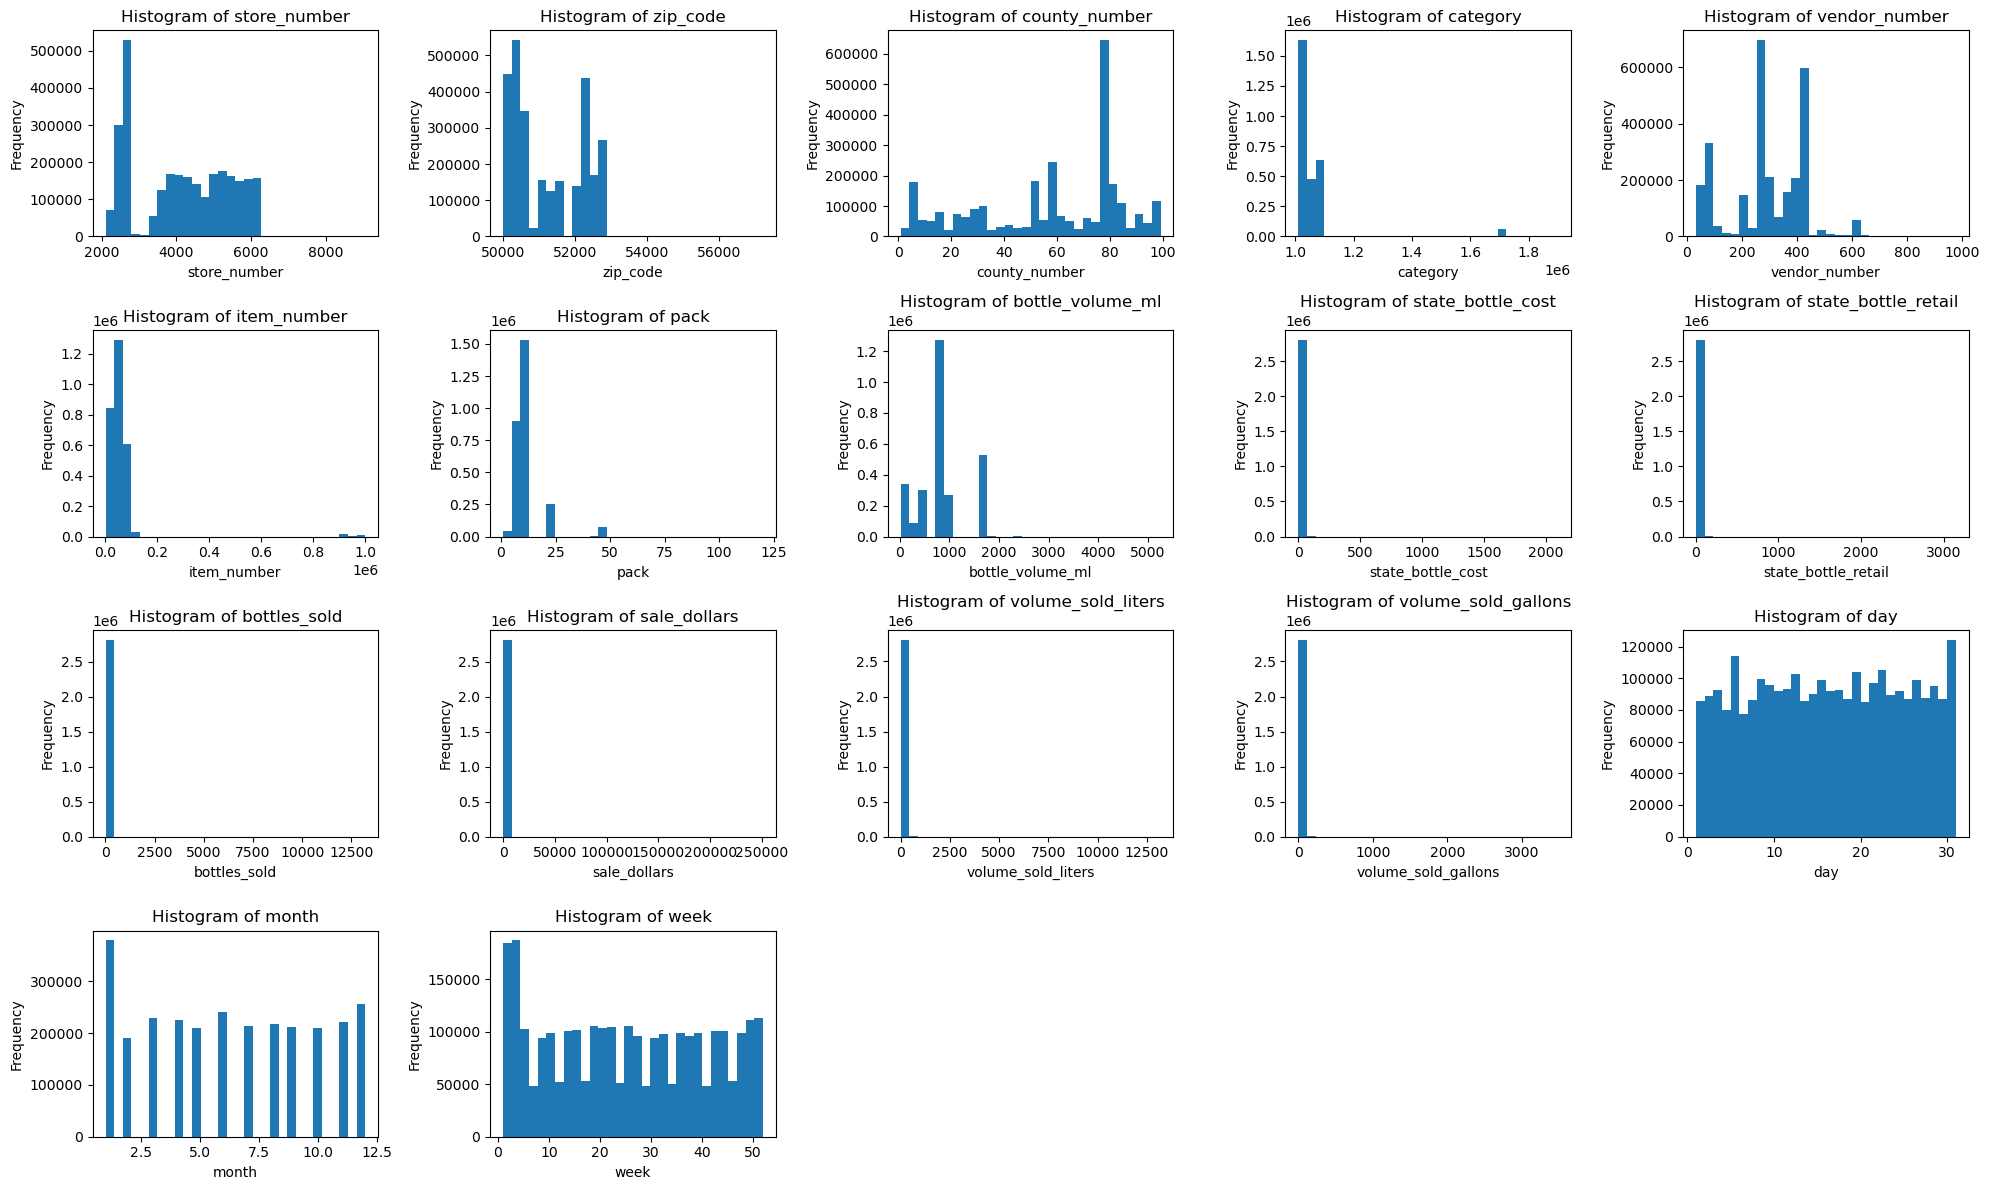

In [43]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns for subplots
num_cols = 5
num_rows, remainder = divmod(len(numeric_columns), num_cols)
num_rows += int(remainder > 0)  

# Create subplots for numeric columns (3x5 grid)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))

# Plot histograms for numeric columns
for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].hist(df[column].dropna(), bins=30)
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Histogram of {column}')

# Hide any remaining empty subplots (if any)
for i in range(len(numeric_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

The histograms for 'store_number' and 'vendor_number' show a few peaks, indicating that certain stores or vendors are more frequent in the dataset than others.
The histograms for 'item_number' and 'category' have a long tail, suggesting a wide variety of items/categories with a few being more common. The 'pack' histogram suggests that certain pack sizes are more common than others. The 'bottle_volume_ml' histogram shows that smaller bottle volumes are more frequently sold.

'sale_dollars' has a long-tailed distribution, indicating a few sales with very high dollar amounts and many lower-value sales. 'bottles_sold' and 'volume_sold_liters' show that smaller quantities dominate the sales.

'state_bottle_cost' and 'state_bottle_retail' histograms display the distribution of the cost and retail prices of bottles. Both show that lower-priced bottles are more common than expensive ones.

The 'month' histogram shows a relatively even distribution with slight fluctuations, possibly indicating seasonal trends. The 'week' histogram has a less uniform distribution, with noticeable variations in frequency that might reflect weekly sales cycles or promotions. The 'day' histogram seems to indicate daily sales patterns with some days having higher frequencies than others. This could be indicative of certain days of the week (like weekends) when sales are higher.

###

### Dig in data

#### Category VS Sales

In [26]:
category_sales = df.groupby('category_name')['sale_dollars'].sum()

# Sort the categories by total sales in descending order and get the top 10
top_10_categories = category_sales.sort_values(ascending=False).head(10)

# Print the top 10 categories and their total sales
print("Top 10 Liquor Categories by Total Sales:")
print(top_10_categories)

Top 10 Liquor Categories by Total Sales:
category_name
American Vodka               65615581.88
Canadian Whiskies            50322883.27
Straight Bourbon Whiskies    36948852.92
Whiskey Liqueur              26664116.55
100% Agave Tequila           25359017.06
Spiced Rum                   24549501.08
Tennessee Whiskies           17219118.57
Imported Brandies            16646780.08
Imported Vodka               15303675.16
Blended Whiskies             13477222.83
Name: sale_dollars, dtype: float64


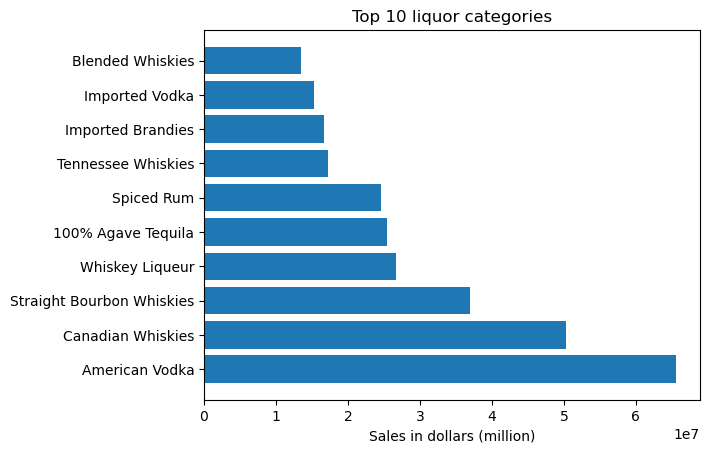

In [27]:
plt.figure()
plt.barh(top_10_categories.index, top_10_categories.values)  
plt.title('Top 10 liquor categories')
plt.xlabel('Sales in dollars (million)') 
plt.yticks(rotation=0)
plt.show()

### 

We would like to see the descending order.

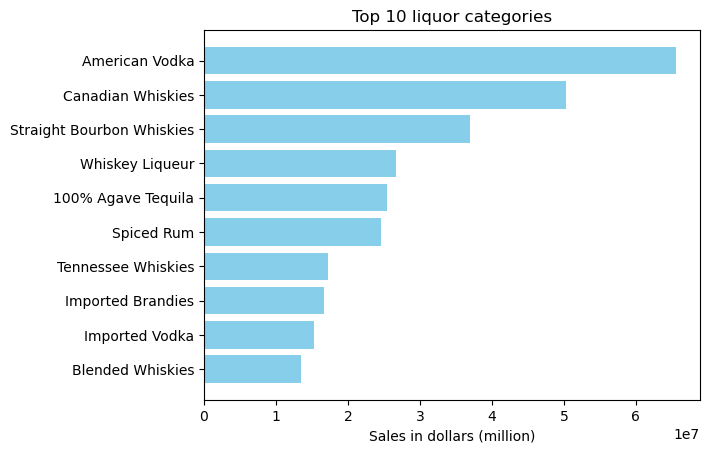

In [28]:
sorted_categories = top_10_categories.sort_values(ascending=False)

plt.figure()
plt.barh(sorted_categories.index[::-1], sorted_categories.values[::-1], color='skyblue') 
plt.title('Top 10 liquor categories')
plt.xlabel('Sales in dollars (million)') 
plt.show()

American Vodka and Canadian Whiskies appear to be the top-selling categories, with American Vodka significantly outperforming all other categories.

The sales distribution is right-skewed, with the highest sales concentrated in a few categories and the remaining categories showing progressively lower sales.

Despite the dominance of American Vodka, there is a diversity of product types among the top sellers, indicating a varied customer preference that might merit a broad product offering.

###

In [29]:
Bottom_10_categories = category_sales.sort_values(ascending=False).tail(10)

# Print the top 10 categories and their total sales
print("Bottom 10 Liquor Categories by Total Sales:")
print(Bottom_10_categories)

Bottom 10 Liquor Categories by Total Sales:
category_name
Triple Sec                     891161.35
Bottled in Bond Bourbon        746417.03
Corn Whiskies                  454838.42
Mezcal                         454088.31
Flavored Gin                   411715.24
American Sloe Gins              33893.97
Distilled Spirits Specialty     30240.00
Imported Whiskies                5518.80
Imported Gins                    3717.84
American Whiskies                1881.00
Name: sale_dollars, dtype: float64


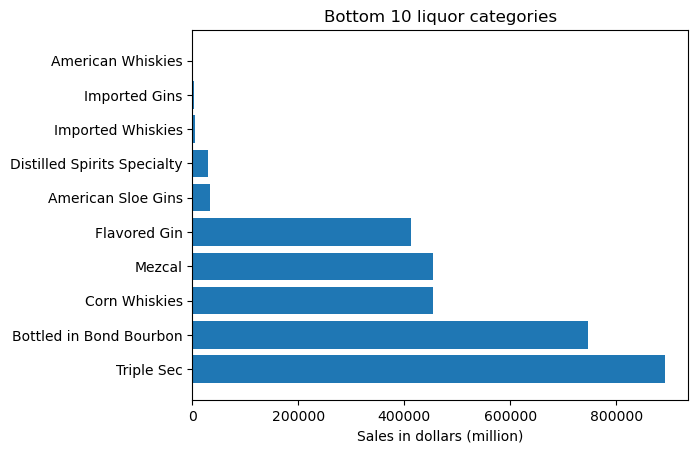

In [30]:
plt.figure()
plt.barh(Bottom_10_categories.index, Bottom_10_categories.values)
plt.title('Bottom 10 liquor categories')
plt.xlabel('Sales in dollars (million)') 
plt.yticks(rotation=0)
plt.show()

'Triple Sec' appears to be the least selling category among the ten listed, which could indicate a lower demand for this type of liquor.
The list includes a variety of spirits, from 'American Whiskies' to 'Imported Gins' and 'Mezcal'. This suggests that even within premium or imported categories, there can be items that do not sell as well.
The presence of 'Corn Whiskies', 'American Sloe Gins', and 'Flavored Gin' in the bottom list may reflect specific market trends or consumer preferences that are moving away from these products.

###

#### City VS Sales

In [31]:
city_sales = df.groupby('city')['sale_dollars'].sum()

# Sort the categories by total sales in descending order and get the top 10
top_10_CitySales = city_sales.sort_values(ascending=False).head(10)

# Print the top 10 categories and their total sales
print("Top 10 City by Total Sales:")
print(top_10_CitySales)

Top 10 City by Total Sales:
city
Des Moines         52950800.00
Cedar Rapids       29198110.04
Davenport          23043484.05
West Des Moines    20098961.86
Council Bluffs     15805748.09
Sioux City         14823856.93
Waterloo           14669248.56
Iowa City          13259368.39
Ames               12368650.56
Ankeny             11850509.68
Name: sale_dollars, dtype: float64


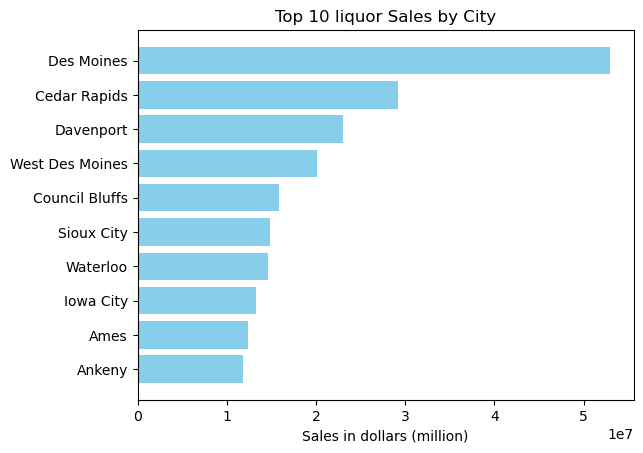

In [32]:
sorted_citysales = top_10_CitySales.sort_values(ascending=False)

plt.figure()
plt.barh(sorted_citysales.index[::-1], sorted_citysales.values[::-1], color='skyblue') 
plt.title('Top 10 liquor Sales by City')
plt.xlabel('Sales in dollars (million)') 
plt.show()

###

#### County VS Sales

In [33]:
county_sales = df.groupby('county')['sale_dollars'].sum()

# Sort the categories by total sales in descending order and get the top 10
top_10_CountySales = county_sales.sort_values(ascending=False).head(10)

# Print the top 10 categories and their total sales
print("Top 10 County by Total Sales:")
print(top_10_CountySales)

Top 10 County by Total Sales:
county
Allamakee     97072983.46
Black hawk    46899874.26
Buena vist    31802688.34
Butler        26227803.15
Carroll       24757724.12
Lyon          16587801.38
Adair         15794963.58
Guthrie       15539036.23
Clay          13931327.62
Fayette        9492819.66
Name: sale_dollars, dtype: float64


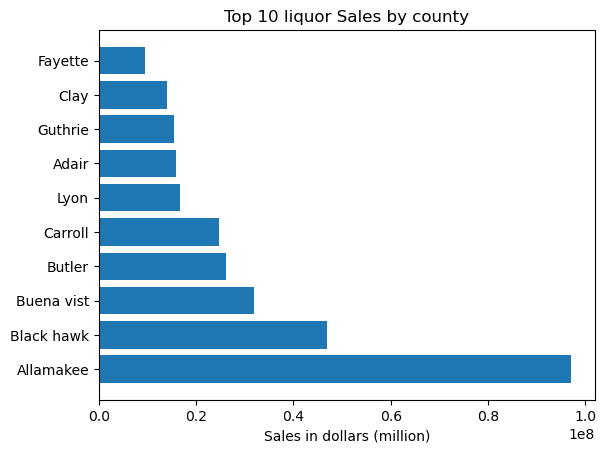

In [34]:
plt.figure()
plt.barh(top_10_CountySales.index, top_10_CountySales.values)  
plt.title('Top 10 liquor Sales by county')
plt.xlabel('Sales in dollars (million)')  
plt.yticks(rotation=0) 
plt.show()

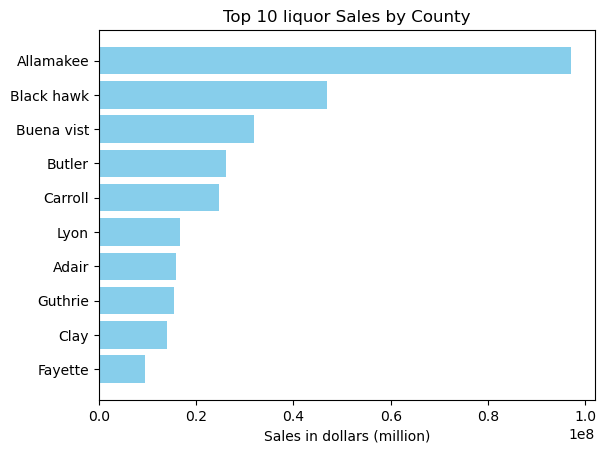

In [35]:
sorted_CountySales = top_10_CountySales.sort_values(ascending=False)

plt.figure()
plt.barh(sorted_CountySales.index[::-1], sorted_CountySales.values[::-1], color='skyblue') 
plt.title('Top 10 liquor Sales by County')
plt.xlabel('Sales in dollars (million)') 
plt.show()

###

### Vendor VS Sales

In [36]:
Vendor_sales = df.groupby('vendor_name')['sale_dollars'].sum()

top_10_vendorSales = Vendor_sales.sort_values(ascending=False).head(10)

top_10_vendorSales

vendor_name
DIAGEO AMERICAS         90260727.79
SAZERAC COMPANY  INC    56714311.97
Jim Beam Brands         34181650.80
Heaven Hill Brands      28740312.62
PERNOD RICARD USA       28179396.03
FIFTH GENERATION INC    27652339.46
BACARDI USA INC         25030444.14
Brown Forman Corp.      21068671.09
LUXCO INC               17959636.26
PROXIMO                 15748297.58
Name: sale_dollars, dtype: float64

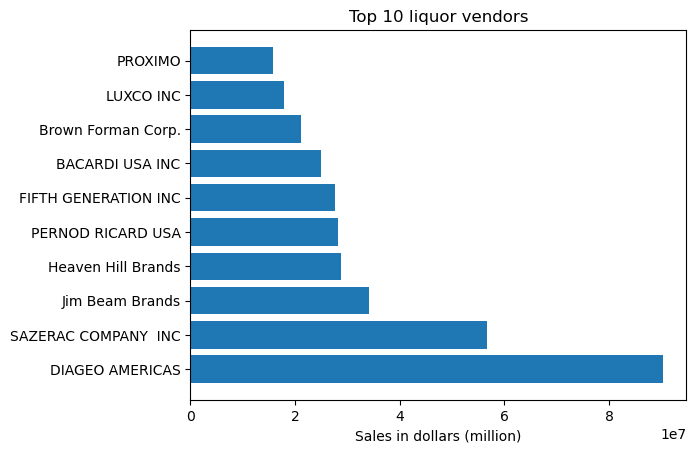

In [37]:
plt.figure()
plt.barh(top_10_vendorSales.index, top_10_vendorSales.values) 
plt.title('Top 10 liquor vendors')
plt.xlabel('Sales in dollars (million)')  
plt.yticks(rotation=0)  
plt.show()

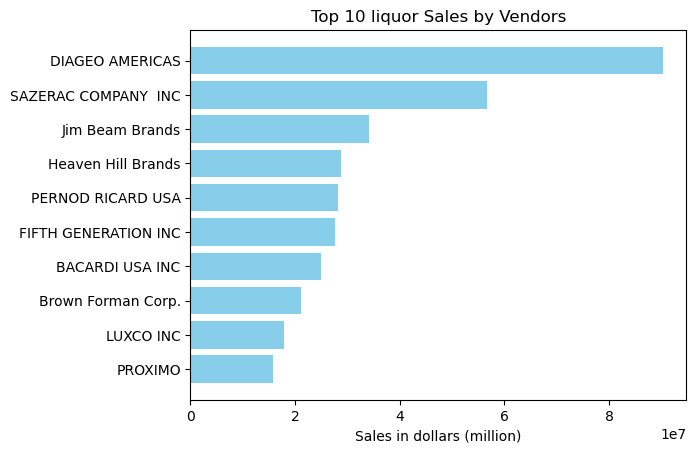

In [38]:
sorted_vendorSales = top_10_vendorSales.sort_values(ascending=False)

plt.figure()
plt.barh(sorted_vendorSales.index[::-1], sorted_vendorSales.values[::-1], color='skyblue') 
plt.title('Top 10 liquor Sales by Vendors')
plt.xlabel('Sales in dollars (million)') 
plt.show()

###

In [39]:
#Make a copy of subset just in case
df1=df.copy()

###

 ### Correlation

In [40]:
%matplotlib inline

C:\Users\hp\AppData\Local\Temp\ipykernel_18912\2569383420.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().round(2)


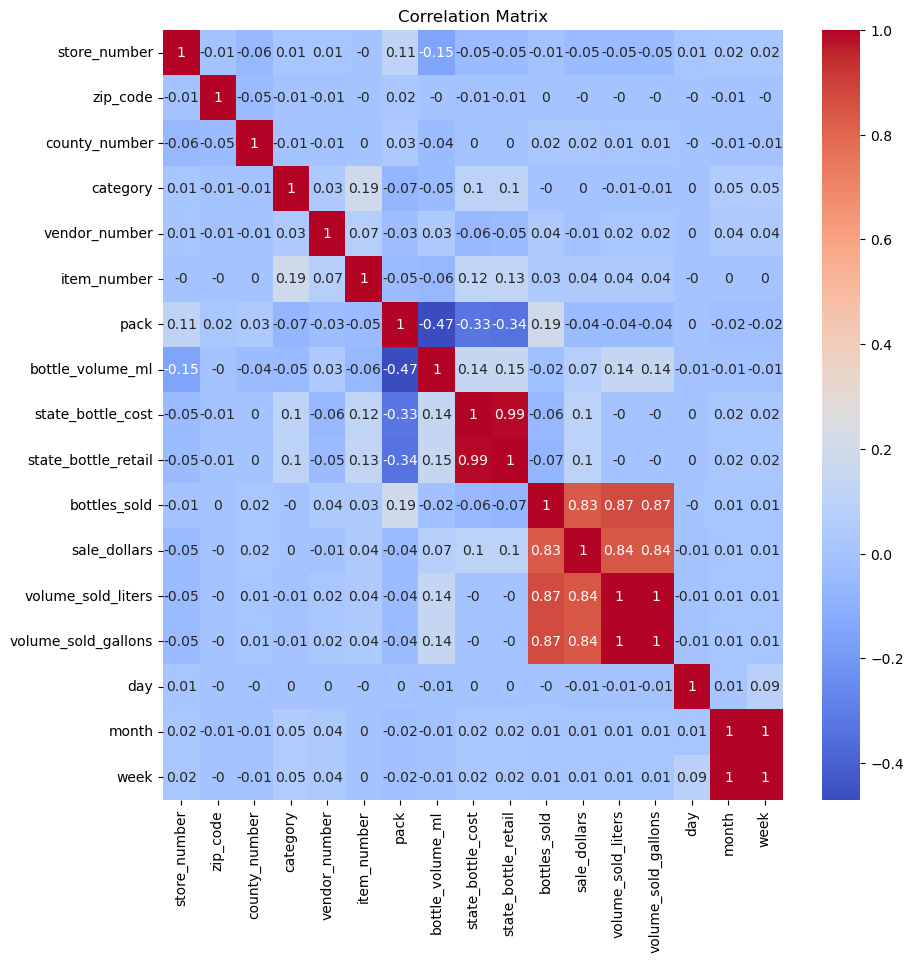

In [42]:
plt.figure(figsize=(10, 10))
corr_matrix = df.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We need to drop one column for each pair with correlation of 1 to fit our models.  We need to avovid perfect multicollinearity in linear regression models.
Correlation=1 means that this column is perfectly correlated with another column in the dataset. In other words, the two columns provide exactly the same information.

Since volume_sold_liters have high correlation with sale, we would change it to dummy variables in order to keep it for modelling.

Next Notebook is feature engineering.

In [ ]:
END